In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from plotly.subplots import make_subplots
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


warnings.filterwarnings('ignore')
sns.set_theme(style="darkgrid")

In [190]:
DatosExcel = pd.read_csv('./Car details v3.csv')

In [191]:
DatosExcel.head(16)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [192]:
# (1). Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
DatosExcel.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [193]:
print(DatosExcel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None


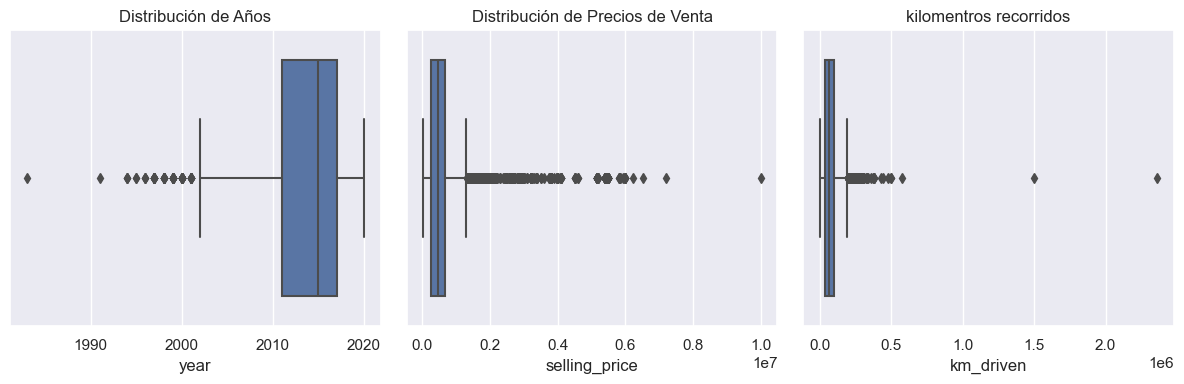

In [194]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Boxplot para 'year' en el primer eje
sns.boxplot(x=DatosExcel['year'], ax=axes[0])
axes[0].set_title('Distribución de Años')

# Boxplot para 'selling_price' en el segundo eje
sns.boxplot(x=DatosExcel['selling_price'], ax=axes[1])
axes[1].set_title('Distribución de Precios de Venta')

sns.boxplot(x=DatosExcel['km_driven'], ax=axes[2])
axes[2].set_title('kilomentros recorridos')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

In [92]:
DatosExcel.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

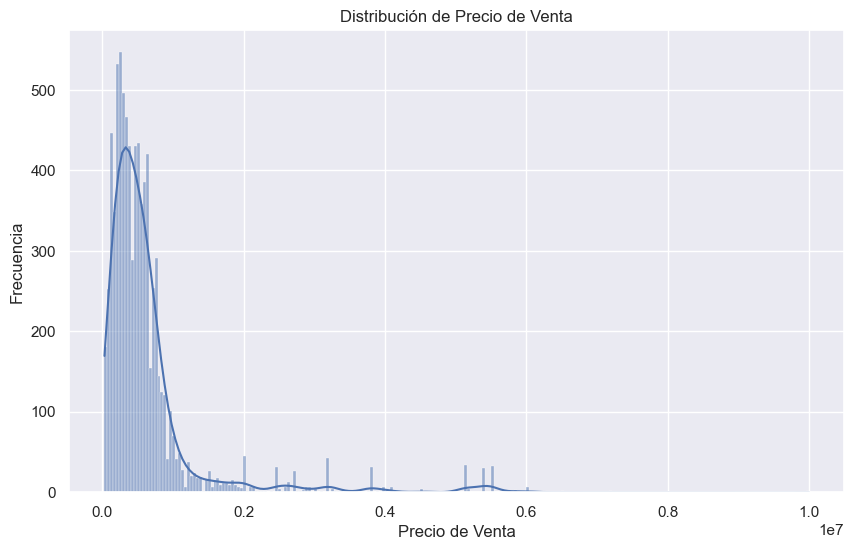

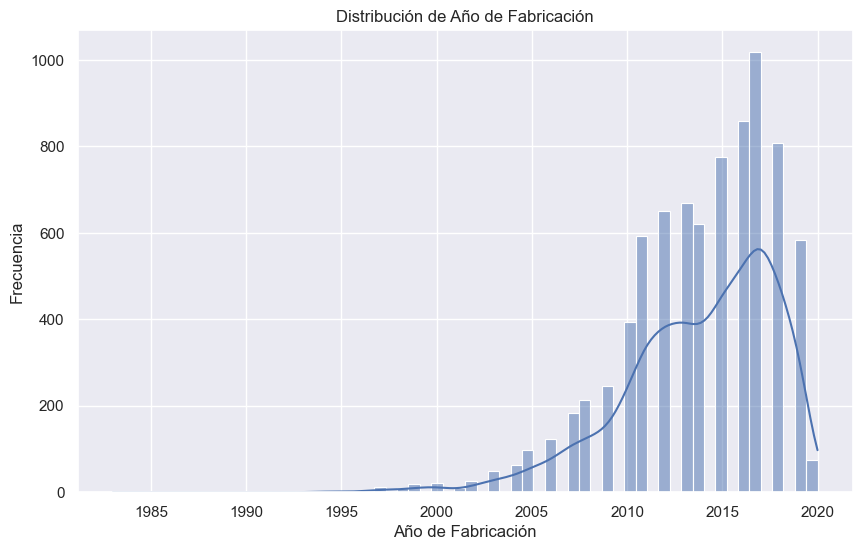

In [195]:
# Visualizar la distribución de precios de venta usando un histograma
plt.figure(figsize=(10, 6))
sns.histplot(DatosExcel['selling_price'], kde=True)
plt.title('Distribución de Precio de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la distribución del año de fabricación usando un histograma
plt.figure(figsize=(10, 6))
sns.histplot(DatosExcel['year'], kde=True)
plt.title('Distribución de Año de Fabricación')
plt.xlabel('Año de Fabricación')
plt.ylabel('Frecuencia')
plt.show()


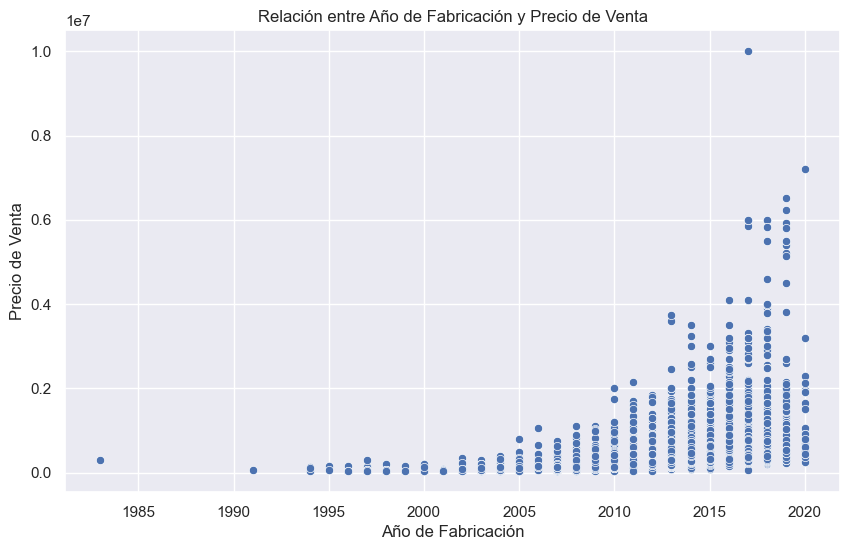

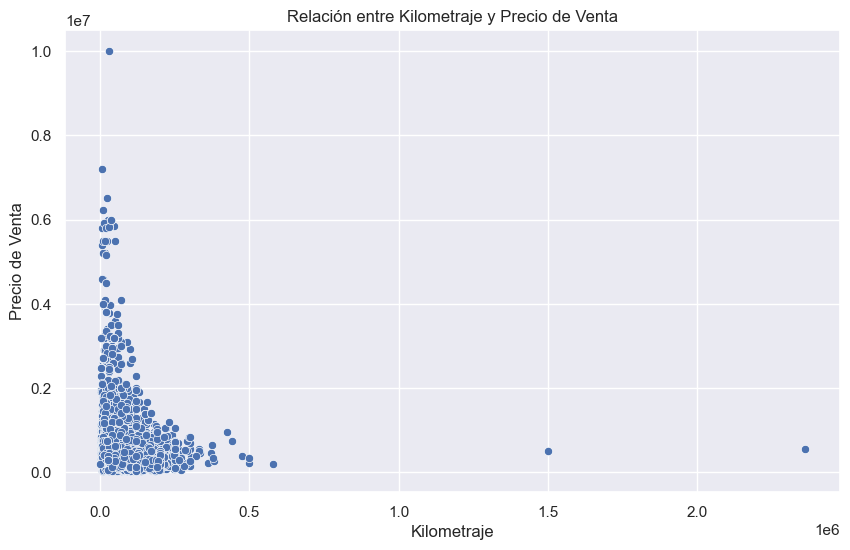

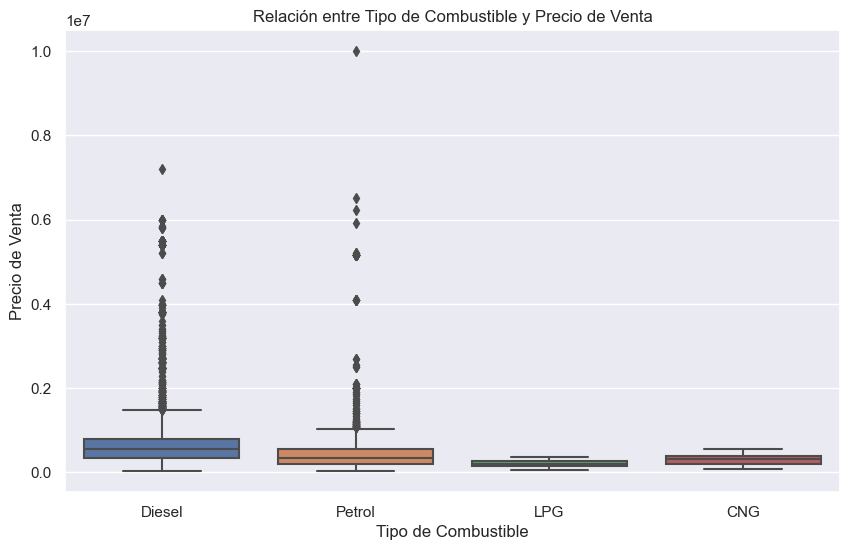

In [108]:
# Visualizar la relación entre el precio de venta y el año de fabricación usando seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=DatosExcel)
plt.title('Relación entre Año de Fabricación y Precio de Venta')
plt.xlabel('Año de Fabricación')
plt.ylabel('Precio de Venta')
plt.show()

# Visualizar la relación entre el kilometraje y el precio de venta usando seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=DatosExcel)
plt.title('Relación entre Kilometraje y Precio de Venta')
plt.xlabel('Kilometraje')
plt.ylabel('Precio de Venta')
plt.show()

# Visualizar la relación entre el tipo de combustible y el precio de venta usando seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='selling_price', data=DatosExcel)
plt.title('Relación entre Tipo de Combustible y Precio de Venta')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio de Venta')
plt.show()


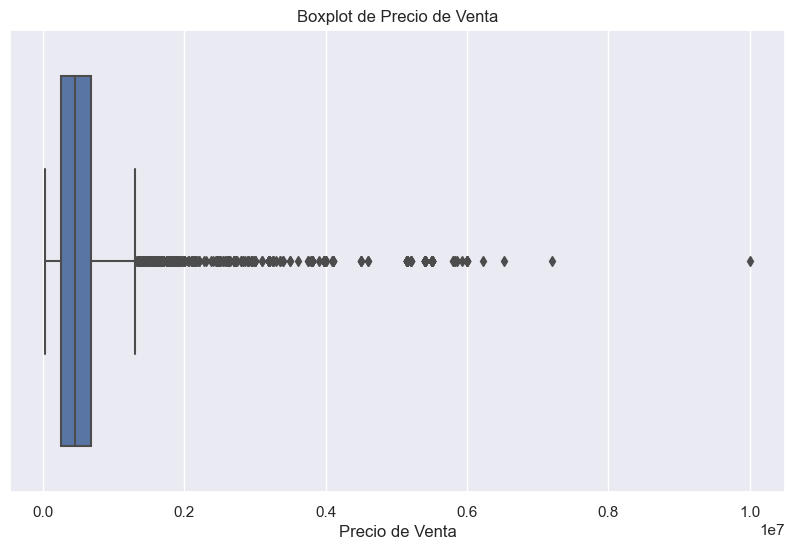

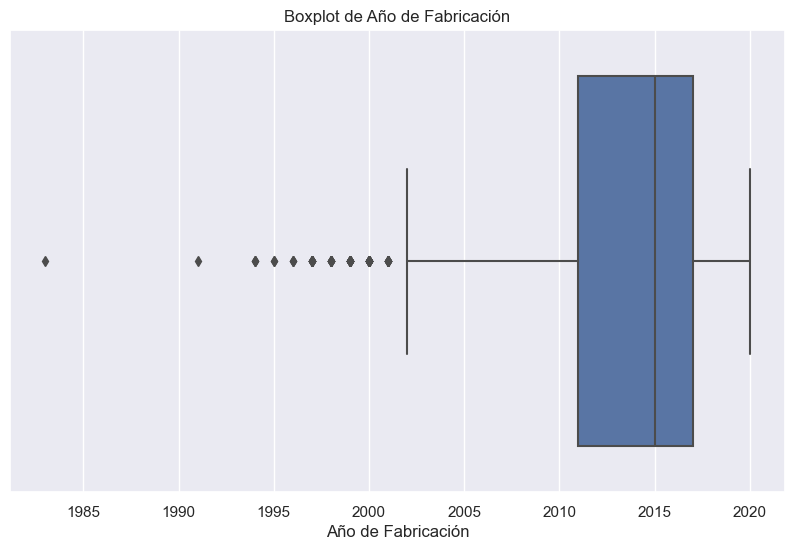

In [196]:
# Visualizar valores atípicos en el precio de venta usando boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=DatosExcel['selling_price'])
plt.title('Boxplot de Precio de Venta')
plt.xlabel('Precio de Venta')
plt.show()

# Visualizar valores atípicos en el año de fabricación usando boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=DatosExcel['year'])
plt.title('Boxplot de Año de Fabricación')
plt.xlabel('Año de Fabricación')
plt.show()


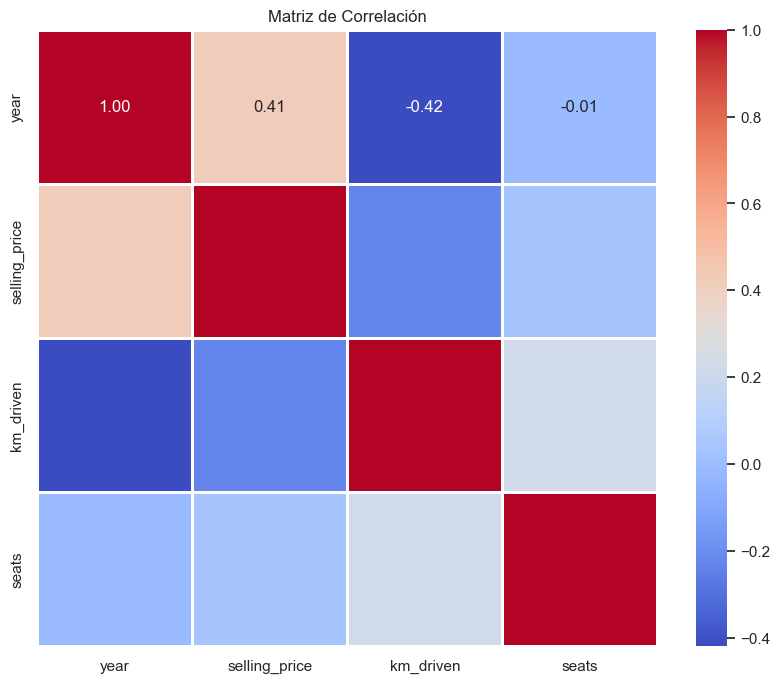

In [197]:
# Seleccionar solo las columnas numéricas para el cálculo de correlación
numeric_cols = DatosExcel.select_dtypes(include=np.number)

# Calcular la matriz de correlación
correlation_matrix = numeric_cols.corr()

# Visualizar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Matriz de Correlación')
plt.show()



In [198]:
# (2). Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 
# Verificar valores faltantes por columna
missing_values = DatosExcel.isnull().sum()
print(missing_values)

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


In [199]:
# Limpiar y convertir 'mileage' a valores numéricos
DatosExcel['mileage'] = DatosExcel['mileage'].str.replace(r' kmpl', '', regex=True)
DatosExcel['mileage'] = pd.to_numeric(DatosExcel['mileage'], errors='coerce')
DatosExcel['mileage'].fillna(DatosExcel['mileage'].median(), inplace=True)

# Limpiar y convertir 'engine' a valores numéricos
DatosExcel['engine'] = DatosExcel['engine'].str.replace(r' CC', '', regex=True)
DatosExcel['engine'] = pd.to_numeric(DatosExcel['engine'], errors='coerce')
DatosExcel['engine'].fillna(DatosExcel['engine'].median(), inplace=True)

# Limpiar y convertir 'max_power' a valores numéricos
DatosExcel['max_power'] = DatosExcel['max_power'].str.replace(r' bhp', '', regex=True)
DatosExcel['max_power'] = pd.to_numeric(DatosExcel['max_power'], errors='coerce')
DatosExcel['max_power'].fillna(DatosExcel['max_power'].median(), inplace=True)

# Limpiar y convertir 'torque' a valores numéricos
DatosExcel['torque'] = DatosExcel['torque'].str.extract(r'(\d+\.?\d*)', expand=False)
DatosExcel['torque'] = pd.to_numeric(DatosExcel['torque'], errors='coerce')
DatosExcel['torque'].fillna(DatosExcel['torque'].median(), inplace=True)

# Imputar valores faltantes en 'seats' con la mediana
DatosExcel['seats'].fillna(DatosExcel['seats'].median(), inplace=True)

# Verificar nuevamente los valores faltantes
missing_values = DatosExcel.isnull().sum()
print(missing_values)



name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64


In [200]:
DatosExcel.head(16)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.00,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,12.70,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.40,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.50,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,19.30,1061.0,57.50,7.80,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,59.00,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,170.00,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,160.00,5.0


In [201]:
# (3). Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
X = DatosExcel.drop('selling_price', axis=1)  # Características
y = DatosExcel['selling_price']  # Variable objetivo

In [202]:
# Imprimir los nombres de las columnas en tu DataFrame X
print(X.columns)

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats'],
      dtype='object')


In [203]:
# Lista de nombres de características categóricas que quieres seleccionar
categorical_features = ['fuel', 'seller_type', 'transmission']

# Verificar si las características categóricas están en las columnas de X
if all(feature in X.columns for feature in categorical_features):
    X_categorical = X[categorical_features]
    print("Características categóricas seleccionadas correctamente.")
else:
    print("¡Error! Algunas características categóricas no están presentes en el DataFrame X.")

Características categóricas seleccionadas correctamente.


In [204]:
# (4) Dividir el dataset en Train y Test para evaluar correctamente el modelo.
# Inicializar OneHotEncoder
encoder = OneHotEncoder()

# Ajustar y transformar las características categóricas
X_encoded = encoder.fit_transform(X_categorical)

# Ahora X_encoded contiene las características categóricas codificadas

In [205]:
# Entrenando modelo de regresión lineal con los datos elegidos
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [206]:
# Entrenando
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [207]:
# (5)Entrenar el modelo configurando los diferentes hiperparámetros
# Evaluando modelo
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 372037192180.3229
R-squared Score: 0.43242406799062716


In [208]:
DatosExcel.head(16)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.00,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,12.70,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.40,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.50,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,19.30,1061.0,57.50,7.80,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,59.00,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,170.00,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,160.00,5.0


In [209]:
# (6)Entrenar el modelo configurando los diferentes hiperparámetros
# Calcular métricas de evaluación adicionales
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Raíz del Error Cuadrático Medio
r2 = r2_score(y_test, y_pred)

# Imprimir métricas de evaluación
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score (R2):", r2)

Mean Absolute Error (MAE): 357361.9520352455
Mean Squared Error (MSE): 372037192180.3229
Root Mean Squared Error (RMSE): 609948.5160079683
R-squared Score (R2): 0.43242406799062716


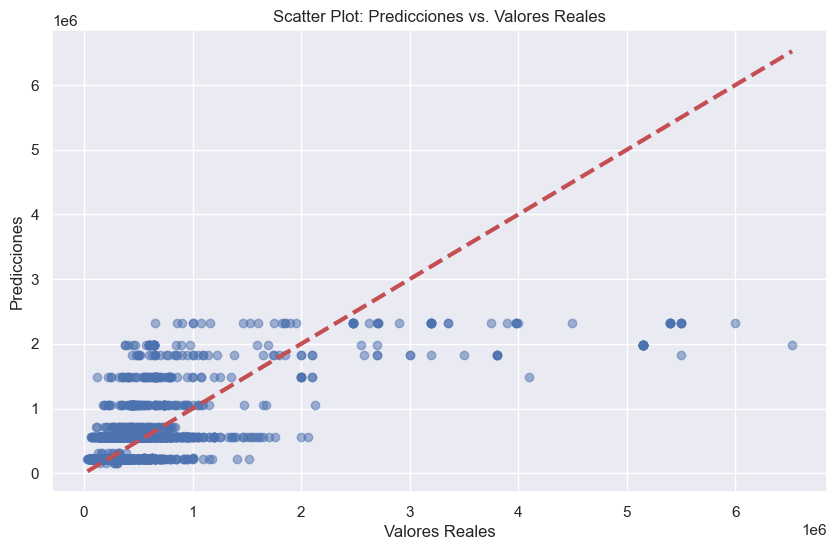

In [210]:
# (7) Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
# Scatter plot de predicciones vs. valores reales

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=3)  # Línea y = x
plt.title('Scatter Plot: Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()



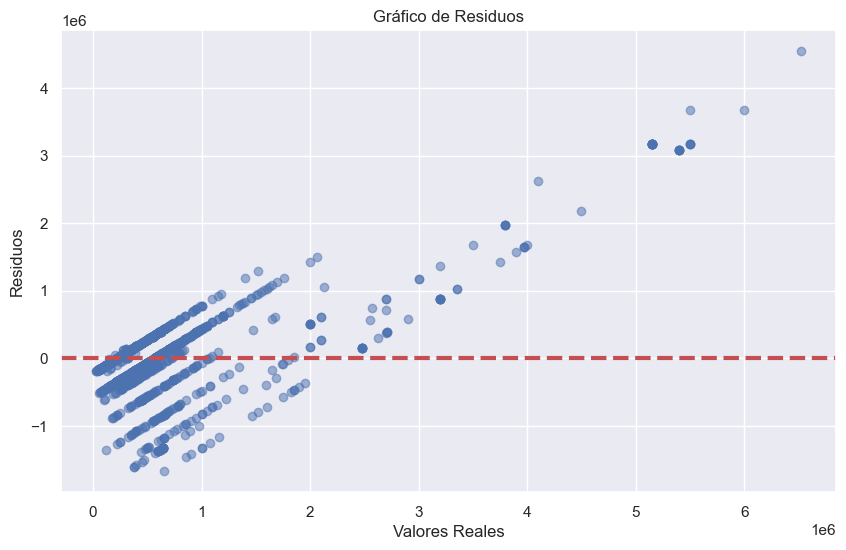

In [211]:
# Gráfico de residuos
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuos, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=3)  # Línea horizontal en y=0
plt.title('Gráfico de Residuos')
plt.xlabel('Valores Reales')
plt.ylabel('Residuos')
plt.show()


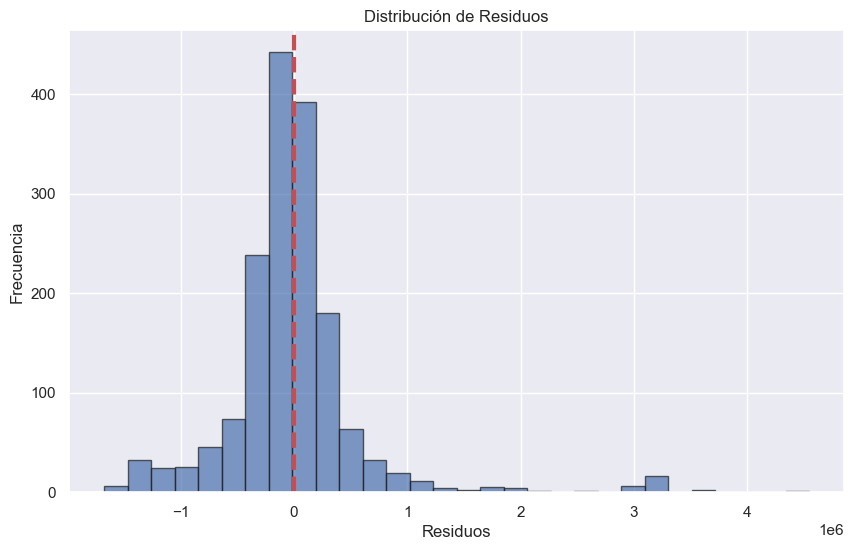

In [212]:
# Gráfico de distribución de residuos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--', lw=3)  # Línea vertical en x=0
plt.title('Distribución de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()
